# 🎵 A Anatomia de um Hit: Análise das Músicas Mais Streamadas do Spotify

 ## Introdução
 No mundo digital da música, o que faz uma canção se tornar um sucesso?
 Esta análise mergulha nos dados das músicas mais streamadas do Spotify para
 desvendar os segredos por trás dos hits modernos.



 ## Objetivos da Análise
 1. 🎯 Identificar padrões que levam ao sucesso musical
 2. 📊 Analisar características técnicas das músicas populares
 3. 💡 Descobrir insights para estratégias de lançamento
 4. 🌟 Entender o impacto das diferentes plataformas


 ## 1. Configuração Inicial
 Importando as bibliotecas necessárias para análise

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display



 ## 2. Carregamento dos Dados
 Lendo o arquivo CSV e mostrando as primeiras linhas

In [2]:


df = pd.read_csv('Spotify Most Streamed Songs.csv')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...



 ## 2.1 Padronização dos Nomes das Variáveis
 Função para limpar e padronizar nomes das colunas

In [3]:


def padronizar_colunas(df):
    """
    Padroniza os nomes das colunas do DataFrame:
    - Remove caracteres especiais
    - Converte para minúsculas
    - Substitui espaços por _
    - Remove parênteses e outros caracteres indesejados
    """
    df = df.copy()
    
    # Dicionário de renomeação específica
    rename_dict = {
        'artist(s)_name': 'artistas',
        'track_name': 'musica',
        'artist_count': 'qt_artistas',
        'released_year': 'ano_lancamento',
        'released_month': 'mes_lancamento',
        'released_day': 'dia_lancamento',
        'in_spotify_playlists': 'playlists_spotify',
        'in_spotify_charts': 'charts_spotify',
        'in_apple_playlists': 'playlists_apple',
        'in_apple_charts': 'charts_apple',
        'in_deezer_playlists': 'playlists_deezer',
        'in_deezer_charts': 'charts_deezer',
        'in_shazam_charts': 'charts_shazam',
        'streams': 'streams',
        'bpm': 'bpm',
        'key': 'tom_musical',
        'mode': 'modo_musical',
        'danceability_%': 'danceability',
        'valence_%': 'valence',
        'energy_%': 'energy',
        'acousticness_%': 'acousticness',
        'instrumentalness_%': 'instrumentalness',
        'liveness_%': 'liveness',
        'speechiness_%': 'speechiness'
    }
    
    # Renomear colunas
    df = df.rename(columns=rename_dict)
    
    print("Colunas renomeadas:")
    for old, new in rename_dict.items():
        print(f"{old:25} -> {new}")
    
    return df

# Aplicar padronização
df = padronizar_colunas(df)

# Verificar novos nomes
print("\nNovas colunas:")
print(df.columns.tolist())

Colunas renomeadas:
artist(s)_name            -> artistas
track_name                -> musica
artist_count              -> qt_artistas
released_year             -> ano_lancamento
released_month            -> mes_lancamento
released_day              -> dia_lancamento
in_spotify_playlists      -> playlists_spotify
in_spotify_charts         -> charts_spotify
in_apple_playlists        -> playlists_apple
in_apple_charts           -> charts_apple
in_deezer_playlists       -> playlists_deezer
in_deezer_charts          -> charts_deezer
in_shazam_charts          -> charts_shazam
streams                   -> streams
bpm                       -> bpm
key                       -> tom_musical
mode                      -> modo_musical
danceability_%            -> danceability
valence_%                 -> valence
energy_%                  -> energy
acousticness_%            -> acousticness
instrumentalness_%        -> instrumentalness
liveness_%                -> liveness
speechiness_%             -> 


 ## 3. Função de Metadados
 Esta função gera um resumo completo do dataset, incluindo:
 - Tipos de dados
 - Valores únicos
 - Valores nulos
 - Uso de memória
 - Exemplos de valores

In [4]:


def metadados(df):
    # Criar DataFrame de metadados
    meta = pd.DataFrame(index=df.columns)
    
    # Tipos de dados
    meta['Tipo'] = df.dtypes
    
    # Contagem de valores únicos
    meta['Valores Únicos'] = df.nunique()
    
    # Valores nulos
    meta['Nulos'] = df.isnull().sum()
    meta['% Nulos'] = (df.isnull().sum() / len(df) * 100).round(2)
    
    # Memória utilizada
    meta['Memória (MB)'] = df.memory_usage(deep=True) / 1024 / 1024
    
    # Primeiros valores únicos (amostra)
    meta['Exemplos'] = [df[col].dropna().unique()[:3].tolist() for col in df.columns]
    
    print("="*80)
    print(f"RESUMO DO DATASET")
    print(f"Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
    print(f"Uso de Memória Total: {df.memory_usage().sum() / 1024 / 1024:.2f} MB")
    print("="*80)
    
    return meta



 ## 4. Análise Inicial dos Dados
 Executando a função de metadados para entender a estrutura do dataset

In [5]:


metadados_df = metadados(df)
display(metadados_df)

RESUMO DO DATASET
Dimensões: 953 linhas x 25 colunas
Uso de Memória Total: 0.18 MB


,Tipo,Valores Únicos,Nulos,% Nulos,Memória (MB),Exemplos
musica,object,943,0,0.00,0.062890,"[Seven (feat. Latto) (Explicit Ver.), LALA, va..."
artistas,object,645,0,0.00,0.061480,"[Latto, Jung Kook, Myke Towers, Olivia Rodrigo]"
qt_artistas,int64,8,0,0.00,0.007271,"[2, 1, 3]"
ano_lancamento,int64,50,0,0.00,0.007271,"[2023, 2019, 2022]"
mes_lancamento,int64,12,0,0.00,0.007271,"[7, 3, 6]"
dia_lancamento,int64,31,0,0.00,0.007271,"[14, 23, 30]"
playlists_spotify,int64,879,0,0.00,0.007271,"[553, 1474, 1397]"
charts_spotify,int64,82,0,0.00,0.007271,"[147, 48, 113]"
streams,object,949,0,0.00,0.052797,"[141381703, 133716286, 140003974]"
playlists_apple,int64,234,0,0.00,0.007271,"[43, 48, 94]"


 ## 5. Limpeza e Preparação dos Dados
 Função para limpar e corrigir tipos de dados, incluindo:
 - Remoção de colunas desnecessárias
 - Conversão de tipos
 - Tratamento de valores nulos
 - Padronização de formatos

In [6]:

def limpar_dados(df):
    """
    Função única para limpeza e correção de tipos dos dados
    """
    df = df.copy()
    
    print("🎵 Iniciando a mixagem dos dados...")
    
    # 1. Remover colunas desnecessárias
    print("\n🎚️ Removendo ruídos (colunas desnecessárias)...")
    df = df.drop(columns=['cover_url'])
    
    # 2. Tratamento de Streams (outliers e formato)
    print("\n🎛️ Ajustando os níveis de streams...")
    df['streams'] = pd.to_numeric(df['streams'].str.replace(',', ''), errors='coerce')
    
    # Identificar e tratar outliers em streams usando IQR
    Q1 = df['streams'].quantile(0.25)
    Q3 = df['streams'].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Criar coluna para identificar outliers
    df['is_outlier_streams'] = (df['streams'] < limite_inferior) | (df['streams'] > limite_superior)
    print(f"📊 Identificados {df['is_outlier_streams'].sum()} outliers em streams")
    
    # 3. Tratamento de métricas musicais
    metricas_musicais = ['danceability', 'energy', 'valence', 'acousticness', 
                         'instrumentalness', 'liveness', 'speechiness']
    
    print("\n🎼 Normalizando características musicais...")
    for metrica in metricas_musicais:
        # Converter para float
        df[metrica] = df[metrica].astype(float)
        
        # Identificar e marcar outliers
        Q1 = df[metrica].quantile(0.25)
        Q3 = df[metrica].quantile(0.75)
        IQR = Q3 - Q1
        df[f'is_outlier_{metrica}'] = (df[metrica] < (Q1 - 1.5 * IQR)) | (df[metrica] > (Q3 + 1.5 * IQR))
        print(f"📊 {metrica}: {df[f'is_outlier_{metrica}'].sum()} outliers identificados")
    
    # 4. Tratamento de playlists
    print("\n🎯 Ajustando métricas de playlists...")
    playlist_cols = ['playlists_spotify', 'playlists_apple', 'playlists_deezer']
    for col in playlist_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())
    
    # 5. Tratamento final
    print("\n🎹 Finalizando os ajustes...")
    df['tom_musical'] = df['tom_musical'].fillna(df['tom_musical'].mode()[0])
    
    print("\n✨ Mixagem concluída! Dados prontos para análise.")
    return df



 ## 6. Aplicação da Limpeza
 Aplicando as transformações e verificando os resultados

In [7]:

# Aplicar limpeza
df = limpar_dados(df)

# Verificar resultado
metadados_df = metadados(df)
metadados_df.head()

🎵 Iniciando a mixagem dos dados...

🎚️ Removendo ruídos (colunas desnecessárias)...

🎛️ Ajustando os níveis de streams...
📊 Identificados 74 outliers em streams

🎼 Normalizando características musicais...
📊 danceability: 3 outliers identificados
📊 energy: 4 outliers identificados
📊 valence: 0 outliers identificados
📊 acousticness: 0 outliers identificados
📊 instrumentalness: 87 outliers identificados
📊 liveness: 44 outliers identificados
📊 speechiness: 136 outliers identificados

🎯 Ajustando métricas de playlists...

🎹 Finalizando os ajustes...

✨ Mixagem concluída! Dados prontos para análise.
RESUMO DO DATASET
Dimensões: 953 linhas x 32 colunas
Uso de Memória Total: 0.18 MB


,Tipo,Valores Únicos,Nulos,% Nulos,Memória (MB),Exemplos
musica,object,943,0,0.0,0.062890,"[Seven (feat. Latto) (Explicit Ver.), LALA, va..."
artistas,object,645,0,0.0,0.061480,"[Latto, Jung Kook, Myke Towers, Olivia Rodrigo]"
qt_artistas,int64,8,0,0.0,0.007271,"[2, 1, 3]"
ano_lancamento,int64,50,0,0.0,0.007271,"[2023, 2019, 2022]"
mes_lancamento,int64,12,0,0.0,0.007271,"[7, 3, 6]"



 ## 7. Desvendando os Dados: Uma Jornada pelos Hits
 Vamos explorar diferentes aspectos que compõem um sucesso musical moderno.



 ### 7.1 O DNA dos Hits: Análise das Características Musicais
 Explorando os elementos fundamentais que compõem as músicas mais populares

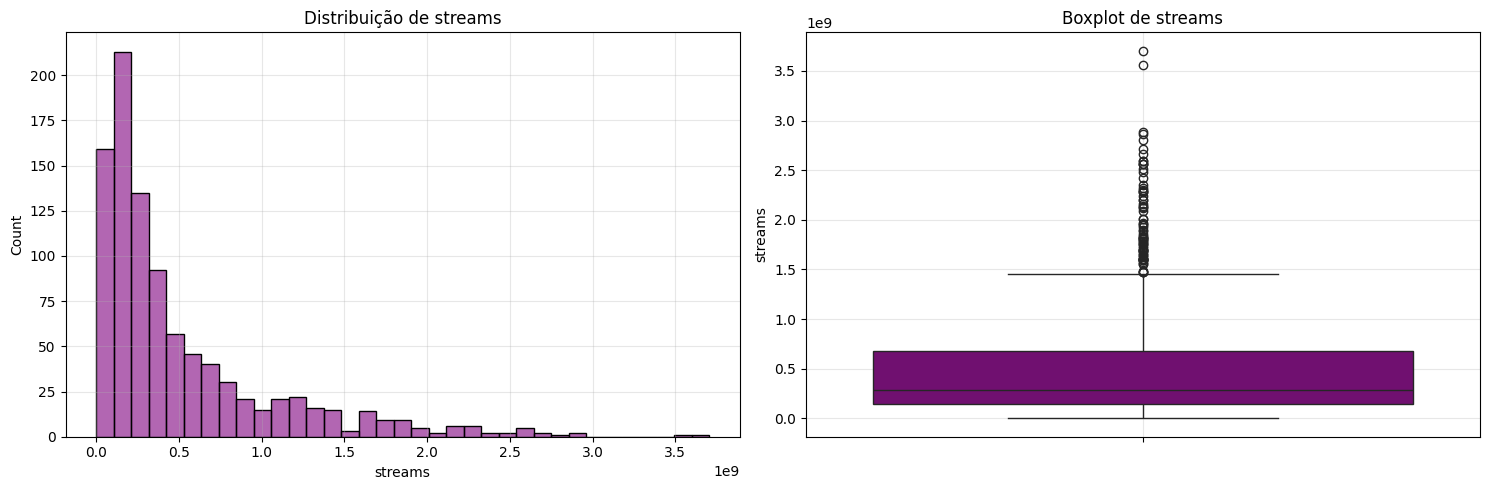

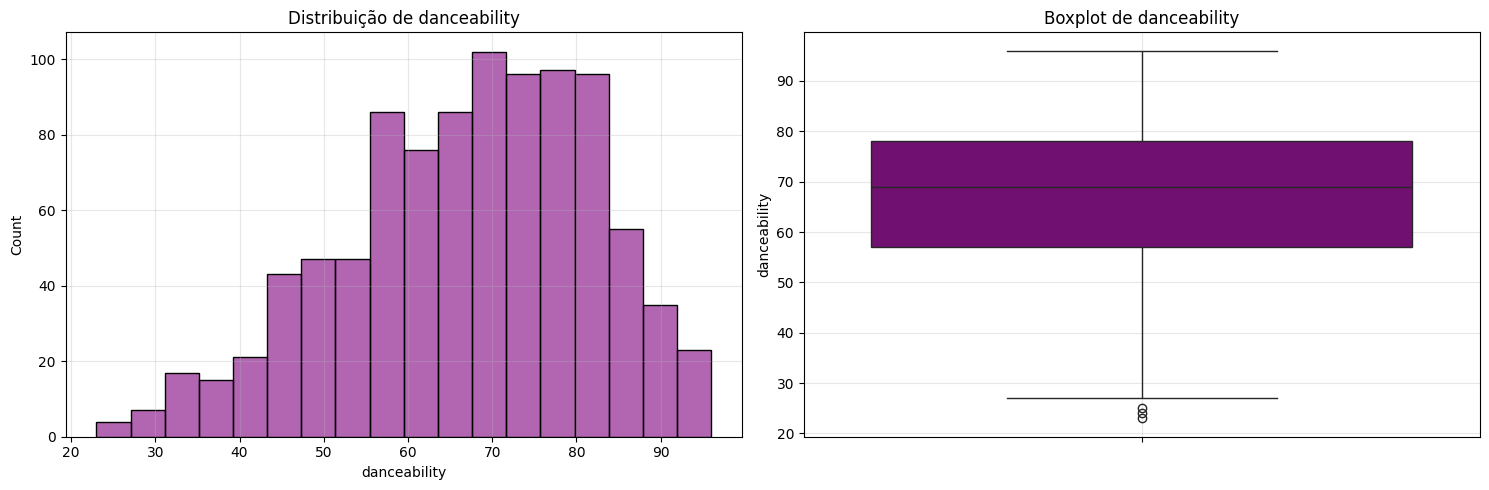

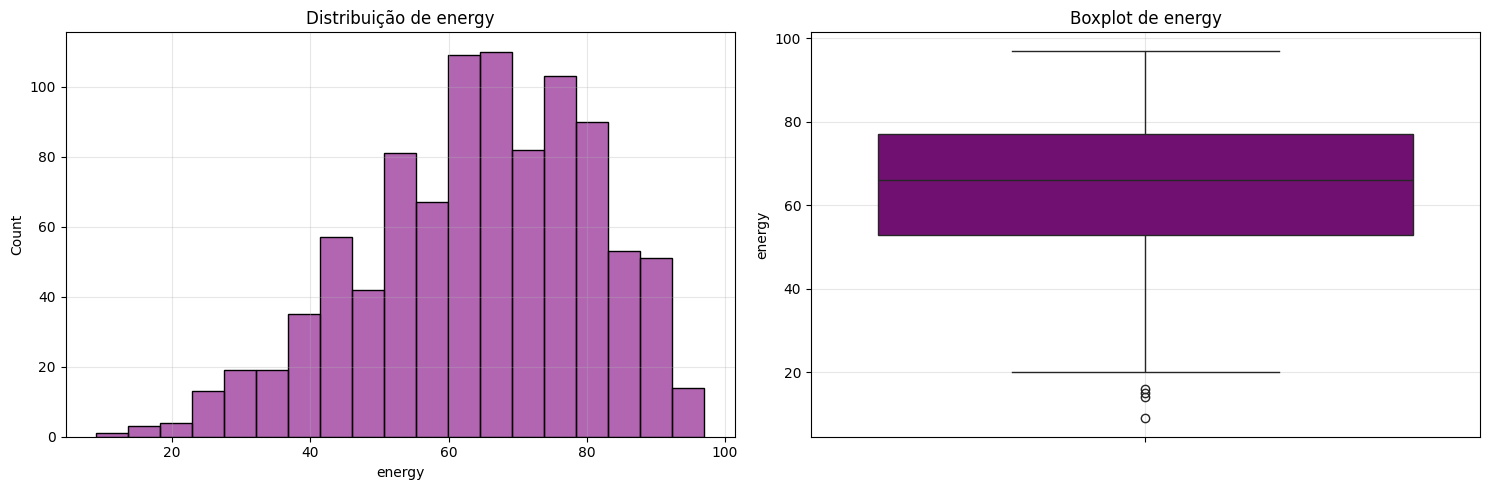

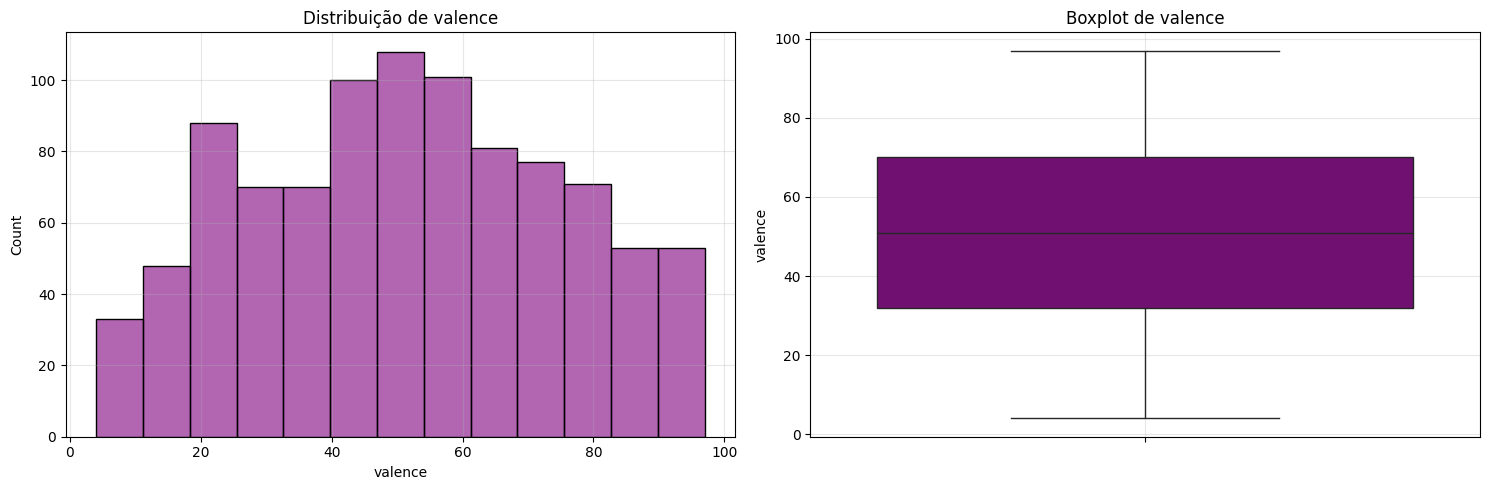

In [8]:

# Função para criar análise univariada
def plot_univariada(df, coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histograma
    sns.histplot(data=df, x=coluna, ax=ax1, color='purple', alpha=0.6)
    ax1.set_title(f'Distribuição de {coluna}')
    ax1.grid(True, alpha=0.3)
    
    # Boxplot
    sns.boxplot(data=df, y=coluna, ax=ax2, color='purple')
    ax2.set_title(f'Boxplot de {coluna}')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Análise das principais variáveis numéricas
variaveis_numericas = ['streams', 'danceability', 'energy', 'valence']
for var in variaveis_numericas:
    plot_univariada(df, var)


 ### 7.2 A Dança dos Números: Correlações e Padrões
 Descobrindo como diferentes características musicais se relacionam com o sucesso

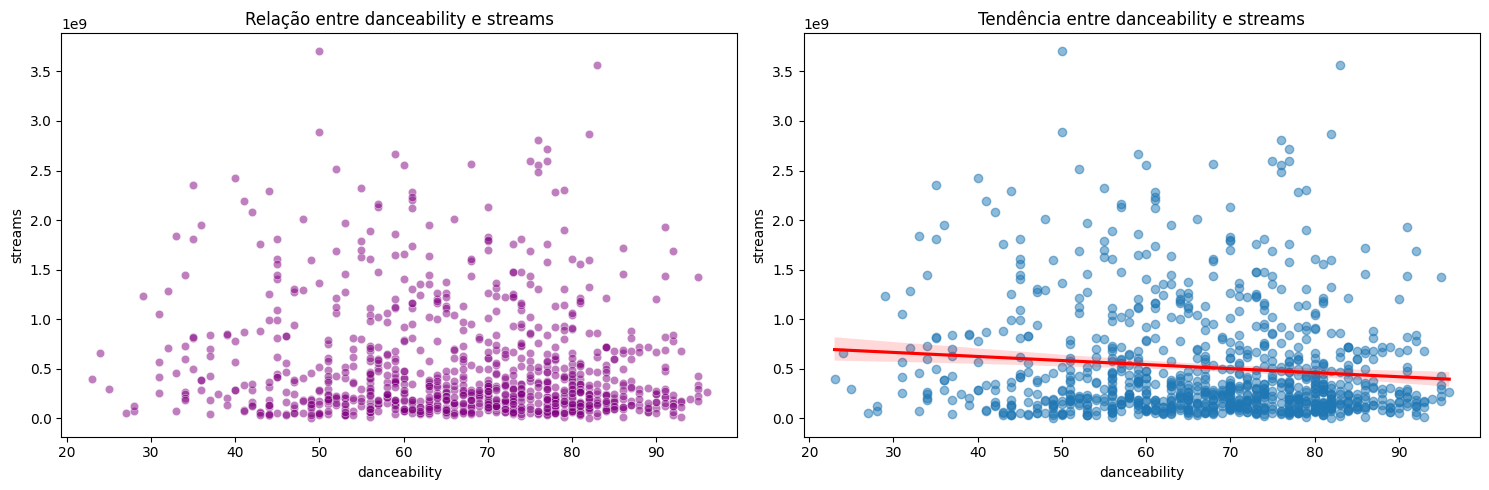

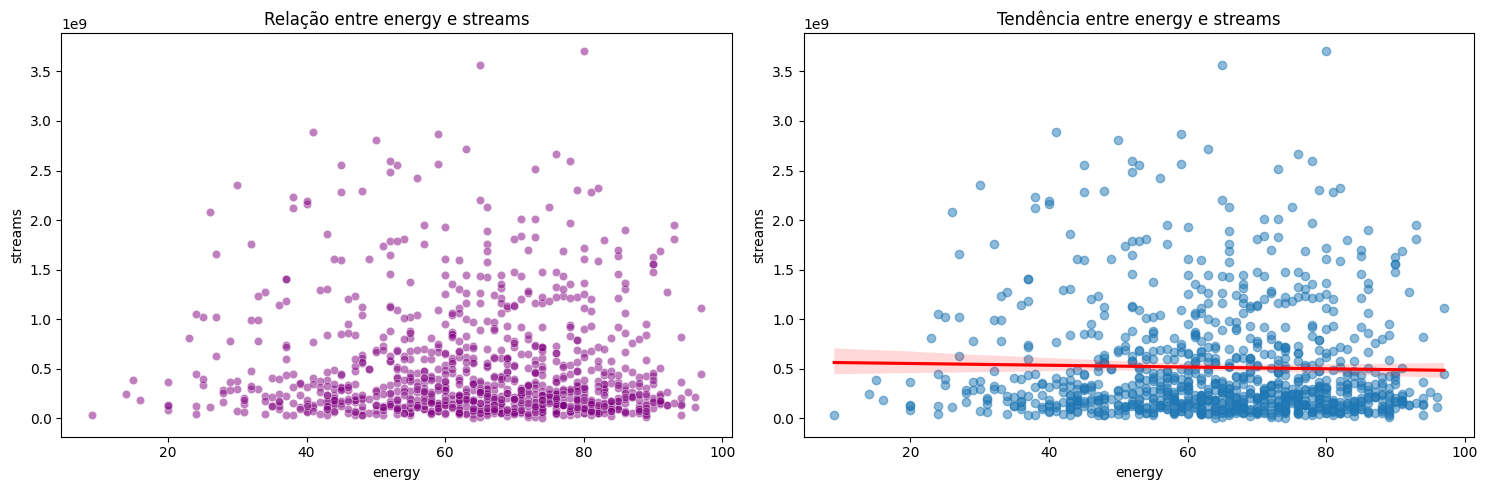

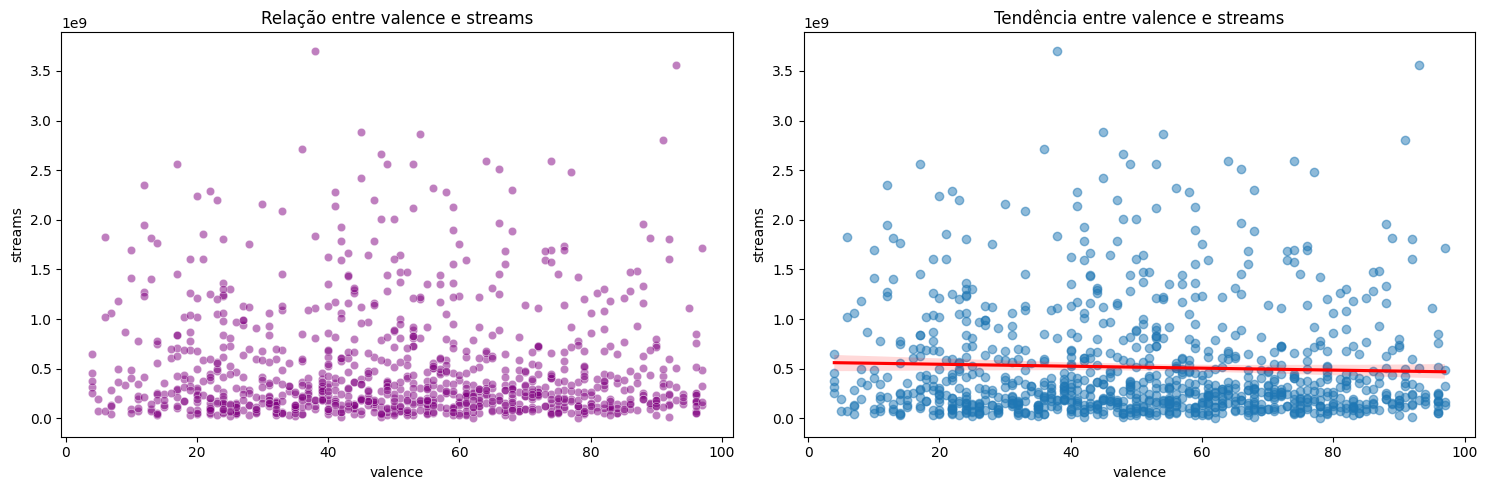

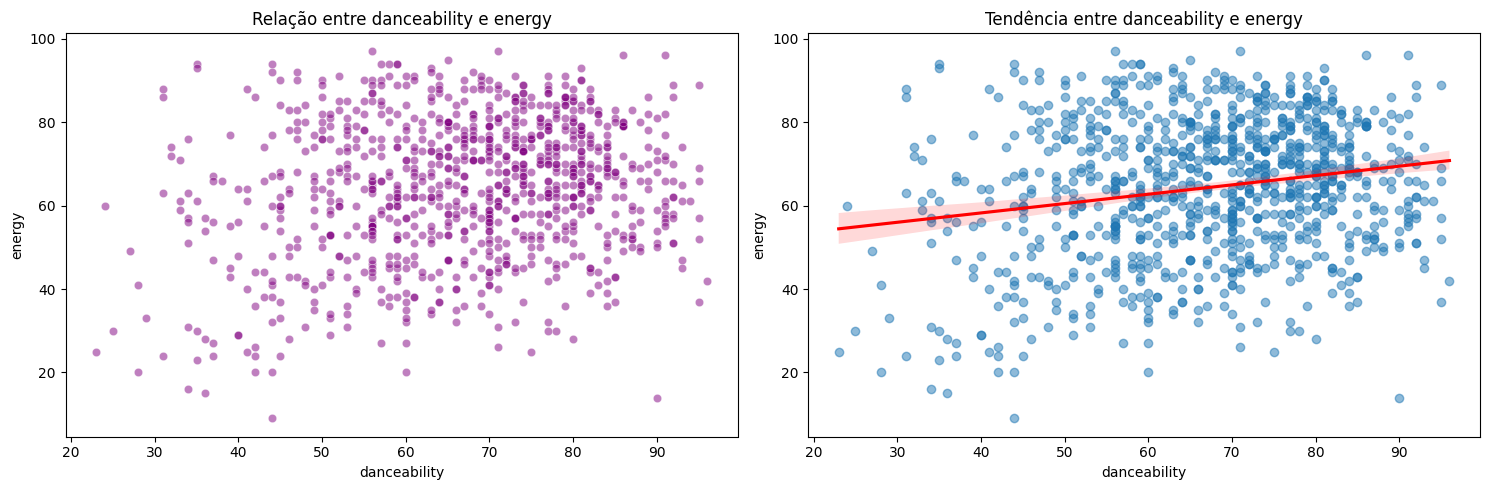

In [9]:


def plot_bivariada(df, x, y):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Scatter plot
    sns.scatterplot(data=df, x=x, y=y, ax=ax1, alpha=0.5, color='purple')
    ax1.set_title(f'Relação entre {x} e {y}')
    
    # Line plot com média móvel
    df_sorted = df.sort_values(by=x)
    sns.regplot(data=df_sorted, x=x, y=y, ax=ax2, 
                scatter_kws={'alpha':0.5}, 
                line_kws={'color': 'red'})
    ax2.set_title(f'Tendência entre {x} e {y}')
    
    plt.tight_layout()
    plt.show()

# Análises bivariadas relevantes
pares_analise = [
    ('danceability', 'streams'),
    ('energy', 'streams'),
    ('valence', 'streams'),
    ('danceability', 'energy')
]

for x, y in pares_analise:
    plot_bivariada(df, x, y)


 ### 7.3 A Arte da Composição: Elementos Musicais
 Analisando as escolhas artísticas que definem os hits

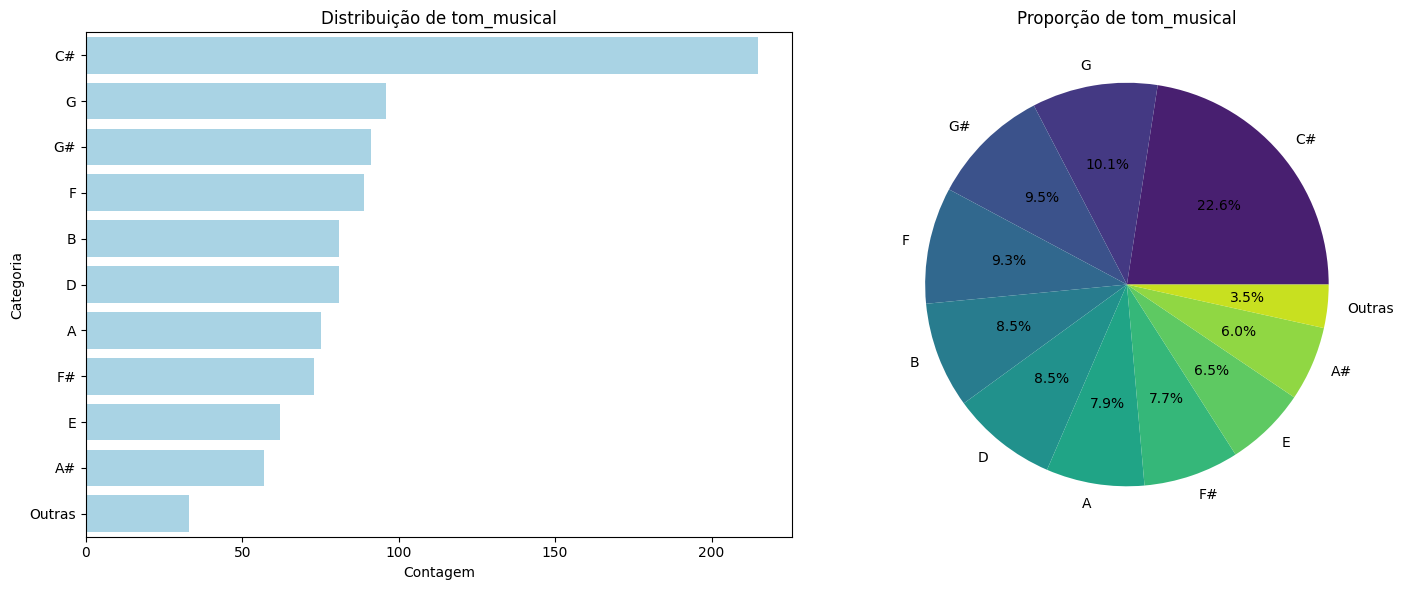

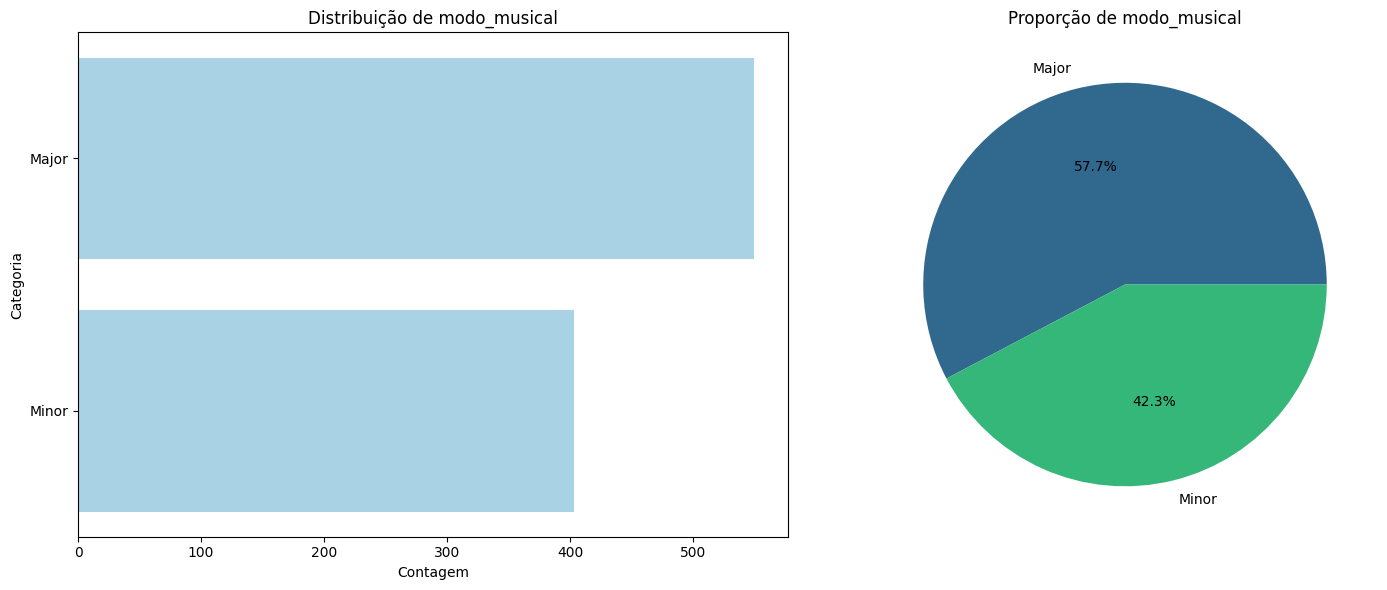

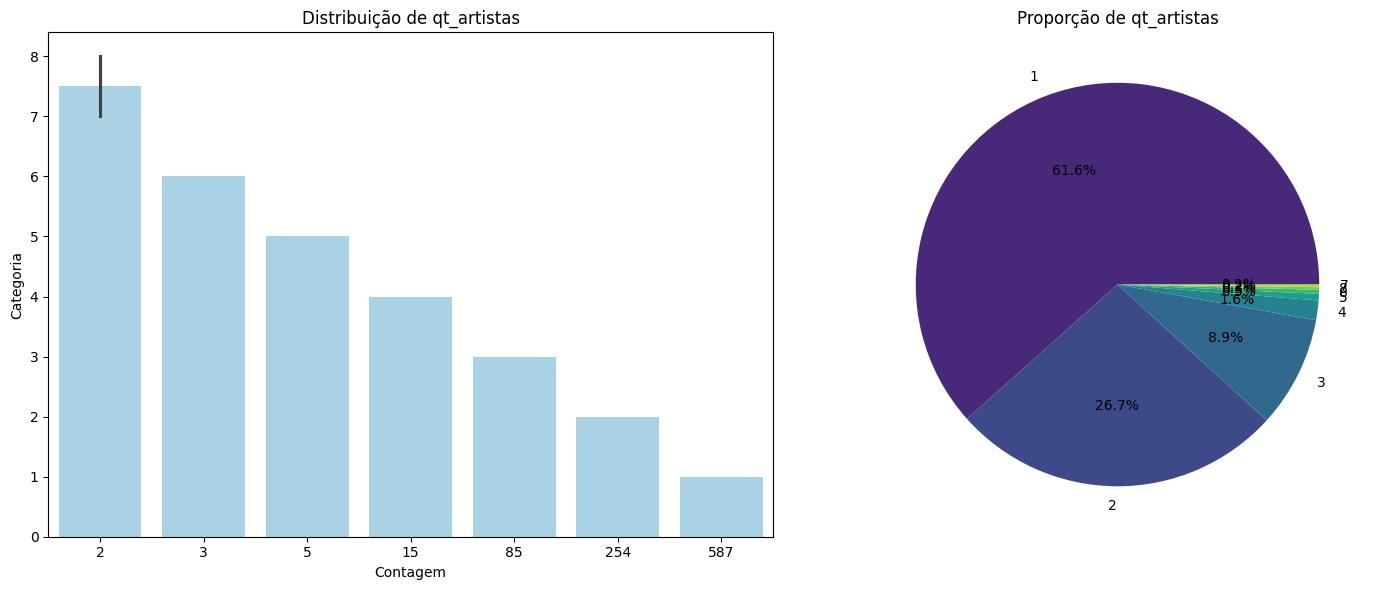

In [10]:
# %% 

def plot_univariada_categorica(df, coluna, limite_categorias=10):
    """
    Análise univariada para variáveis categóricas com gráfico de barras e pizza
    """
    # Preparar dados
    contagem = df[coluna].value_counts()
    if len(contagem) > limite_categorias:
        outras = pd.Series({'Outras': contagem[limite_categorias:].sum()})
        contagem = pd.concat([contagem[:limite_categorias], outras])
    
    # Criar subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de barras atualizado
    data_plot = pd.DataFrame({
        'Categoria': contagem.index,
        'Contagem': contagem.values
    })
    sns.barplot(data=data_plot,
                x='Contagem',
                y='Categoria',
                ax=ax1,
                color='skyblue',
                alpha=0.8)
    ax1.set_title(f'Distribuição de {coluna}')
    ax1.set_xlabel('Contagem')
    
    # Gráfico de pizza
    wedges, texts, autotexts = ax2.pie(contagem.values, 
                                      labels=contagem.index,
                                      autopct='%1.1f%%', 
                                      colors=sns.color_palette('viridis', n_colors=len(contagem)))
    ax2.set_title(f'Proporção de {coluna}')
    
    plt.tight_layout()
    plt.show()

# Análise das principais variáveis categóricas
variaveis_categoricas = ['tom_musical', 'modo_musical', 'qt_artistas']
for var in variaveis_categoricas:
    plot_univariada_categorica(df, var)



 ### 7.4 Relação entre Características Categóricas e Numéricas
 Explorando como diferentes categorias influenciam métricas de sucesso

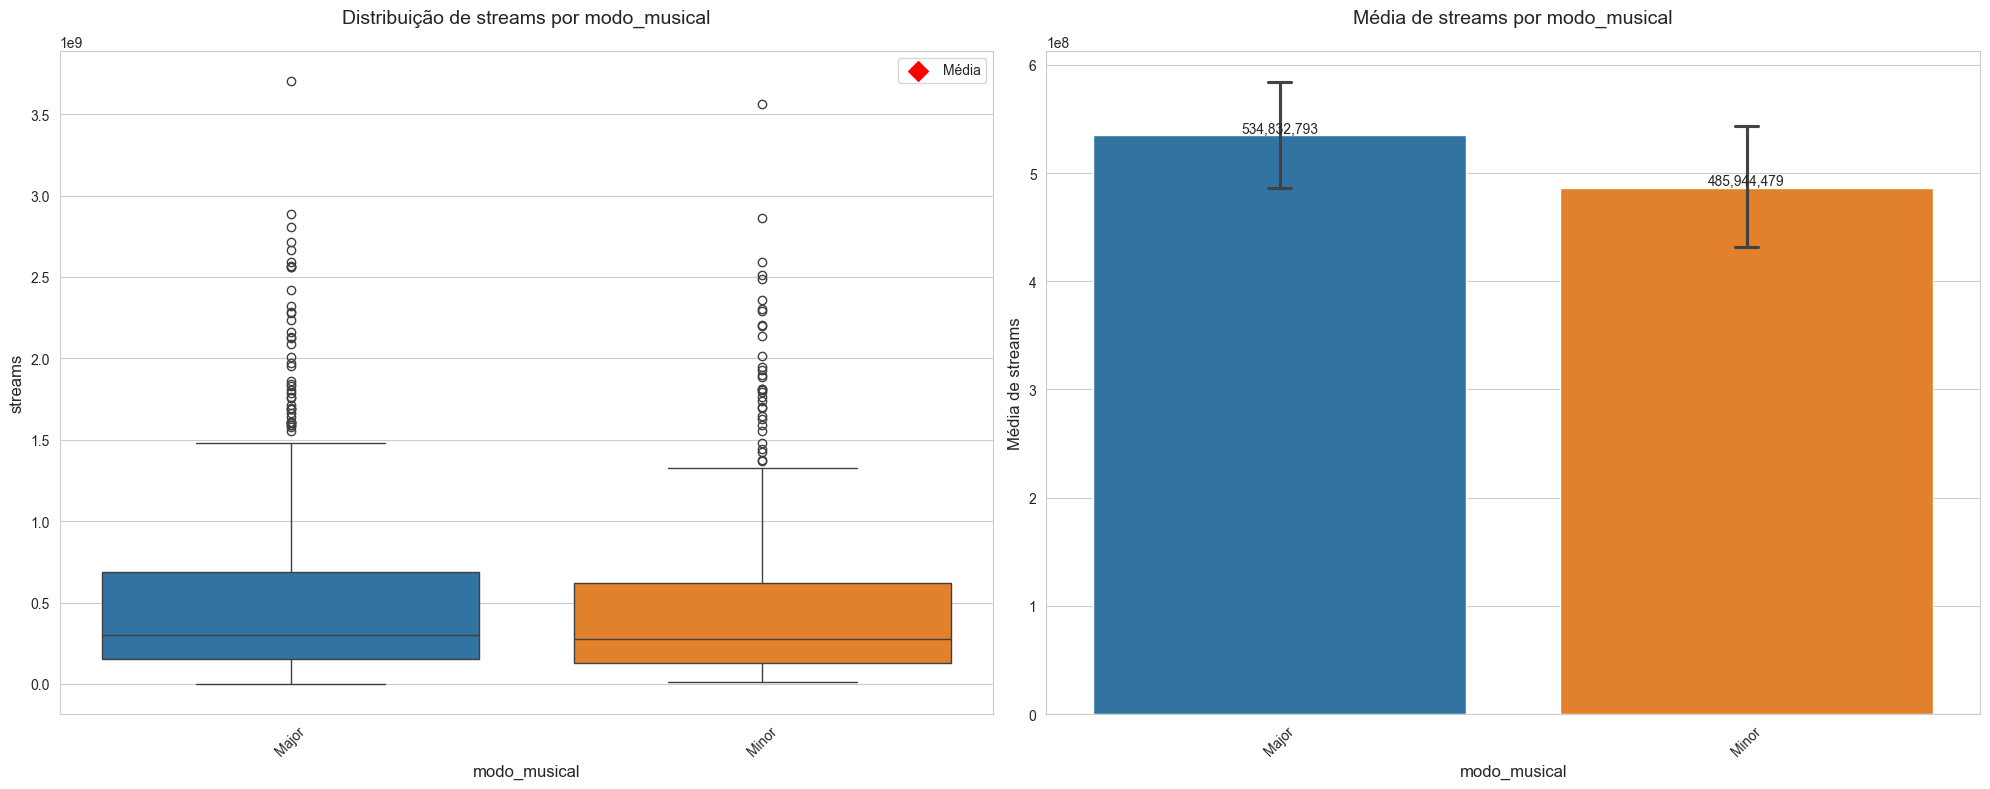


Estatísticas de streams por modo_musical:


,count,mean,std,min,max
modo_musical,,,,,
Major,549,5.348328e+08,5.780509e+08,2762.0,3.703895e+09
Minor,403,4.859445e+08,5.507029e+08,11956641.0,3.562544e+09


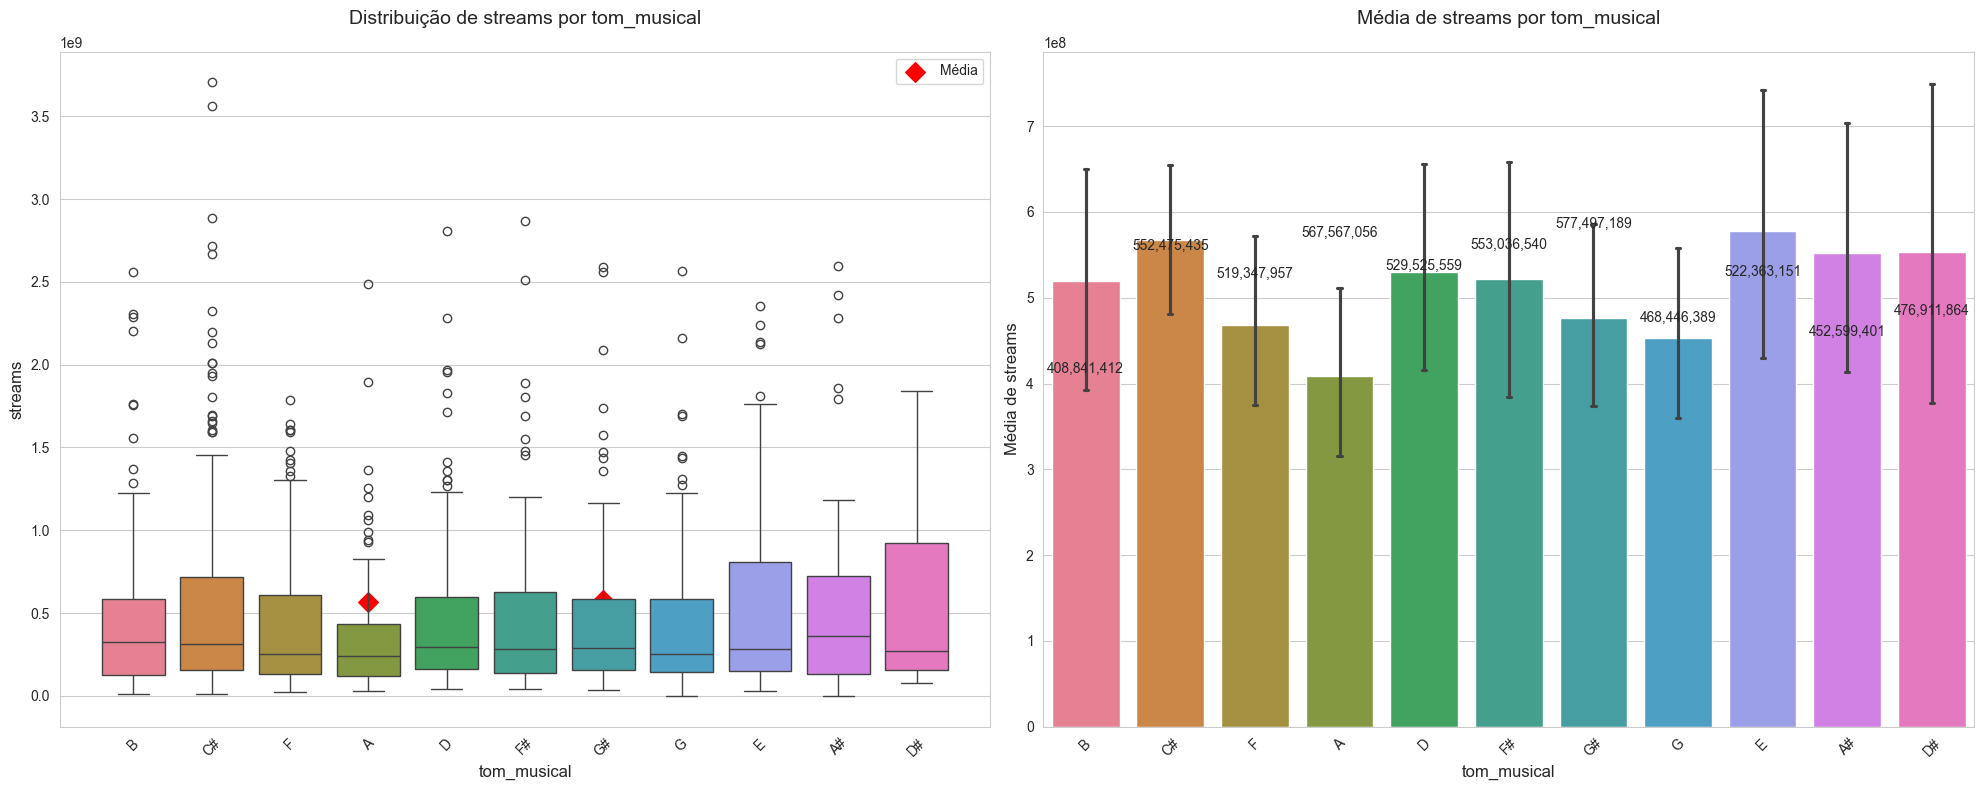


Estatísticas de streams por tom_musical:


,count,mean,std,min,max
tom_musical,,,,,
A,74,4.088414e+08,4.466087e+08,31873544.0,2.484813e+09
A#,57,5.524754e+08,6.020724e+08,2762.0,2.594040e+09
B,81,5.193480e+08,5.910144e+08,11956641.0,2.557976e+09
C#,215,5.675671e+08,6.451459e+08,11599388.0,3.703895e+09
D,81,5.295256e+08,5.739496e+08,39228929.0,2.808097e+09
D#,33,5.530365e+08,5.629377e+08,76831876.0,1.840365e+09
E,62,5.774972e+08,6.144343e+08,29562220.0,2.355720e+09
F,89,4.684464e+08,4.712031e+08,22581161.0,1.788326e+09
F#,73,5.223632e+08,5.845151e+08,39666245.0,2.864792e+09


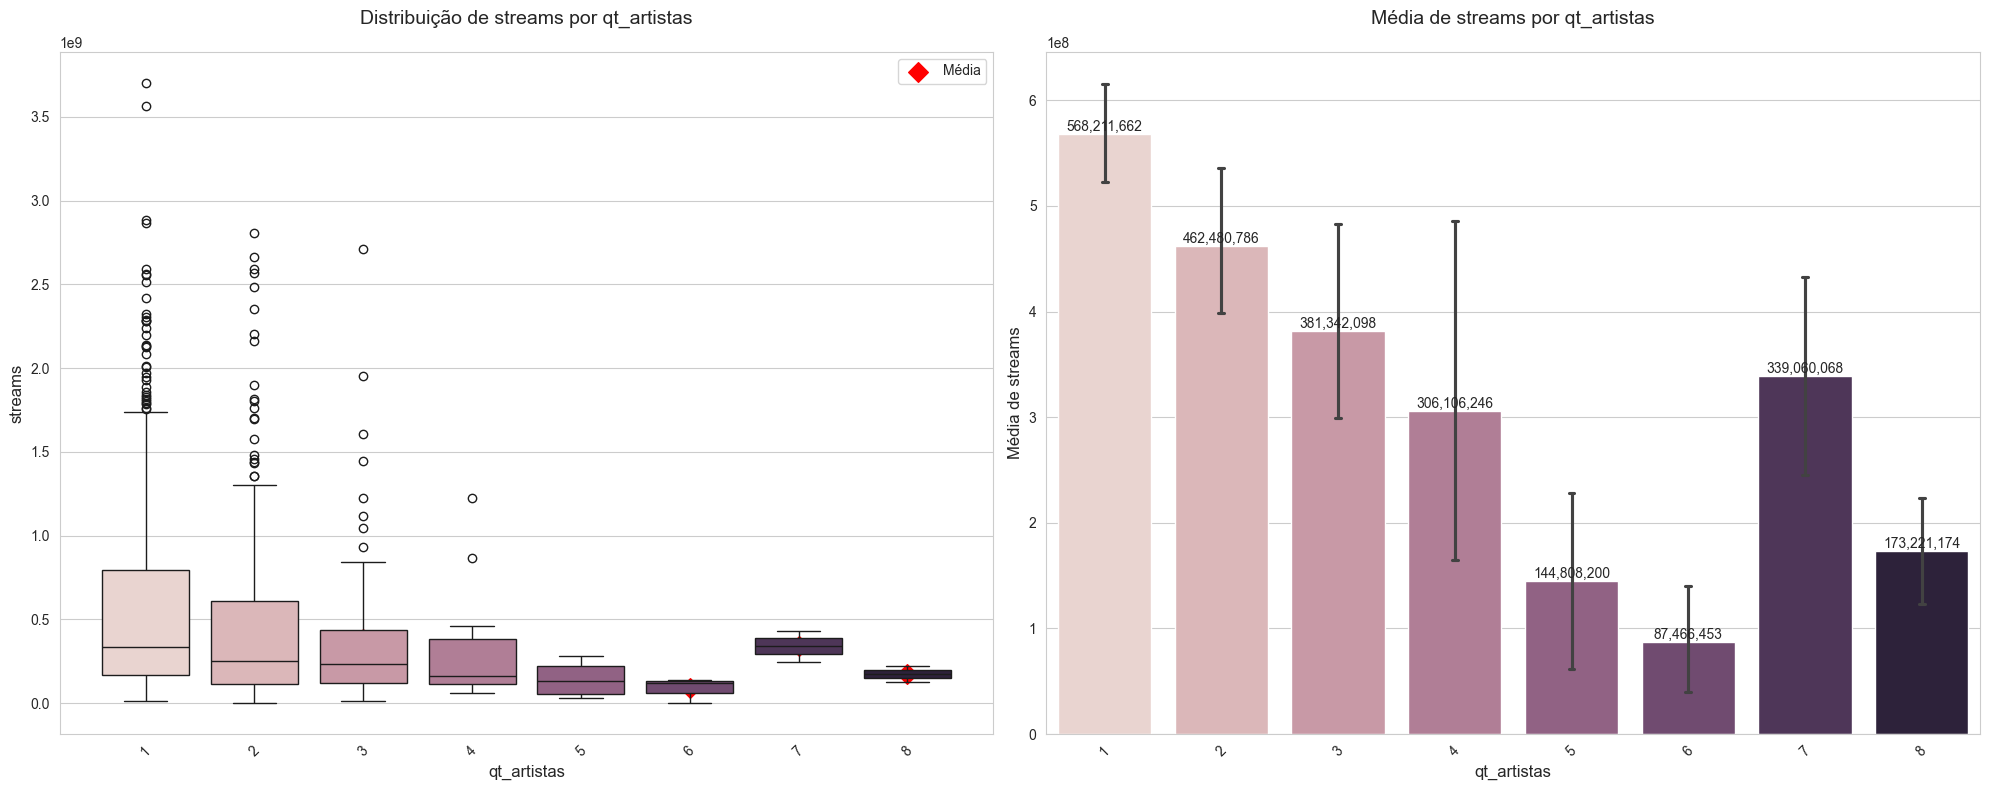


Estatísticas de streams por qt_artistas:


,count,mean,std,min,max
qt_artistas,,,,,
1,586,5.682117e+08,5.936634e+08,14780425.0,3.703895e+09
2,254,4.624808e+08,5.463041e+08,2762.0,2.808097e+09
3,85,3.813421e+08,4.395102e+08,11599388.0,2.713922e+09
4,15,3.061062e+08,3.308621e+08,57312735.0,1.223481e+09
5,5,1.448082e+08,1.064046e+08,32761689.0,2.797174e+08
6,3,8.746645e+07,7.519028e+07,1365184.0,1.401870e+08
7,2,3.390601e+08,1.324551e+08,245400167.0,4.327200e+08
8,2,1.732212e+08,7.085035e+07,123122413.0,2.233199e+08


In [11]:

def plot_bivariada_cat_num(df, cat_col, num_col):
    """
    Análise bivariada entre variável categórica e numérica com visualizações simplificadas e claras
    """
    # Configurar o estilo
    sns.set_style("whitegrid")
    
    # Criar figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # 1. Boxplot aprimorado
    sns.boxplot(data=df, 
                x=cat_col, 
                y=num_col,
                ax=ax1,
                hue=cat_col,
                legend=False)
    
    # Personalização do boxplot
    ax1.set_title(f'Distribuição de {num_col} por {cat_col}', pad=20, fontsize=14)
    ax1.set_xlabel(cat_col, fontsize=12)
    ax1.set_ylabel(num_col, fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    
    # Adicionar pontos de média
    means = df.groupby(cat_col)[num_col].mean()
    ax1.scatter(range(len(means)), means, color='red', s=100, marker='D', label='Média')
    ax1.legend()
    
    # 2. Gráfico de barras com médias
    sns.barplot(data=df,
                x=cat_col,
                y=num_col,
                ax=ax2,
                hue=cat_col,
                legend=False,
                errorbar=('ci', 95),
                capsize=0.05)
    
    # Personalização do gráfico de barras
    ax2.set_title(f'Média de {num_col} por {cat_col}', pad=20, fontsize=14)
    ax2.set_xlabel(cat_col, fontsize=12)
    ax2.set_ylabel(f'Média de {num_col}', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    
    # Adicionar valores nas barras
    for i, v in enumerate(df.groupby(cat_col)[num_col].mean()):
        ax2.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Exibir estatísticas resumidas
    print(f"\nEstatísticas de {num_col} por {cat_col}:")
    stats = df.groupby(cat_col)[num_col].agg(['count', 'mean', 'std', 'min', 'max'])
    display(stats.round(2))

# Análises bivariadas relevantes
analises_cat_num = [
    ('modo_musical', 'streams'),
    ('tom_musical', 'streams'),
    ('qt_artistas', 'streams')
]

for cat_col, num_col in analises_cat_num:
    plot_bivariada_cat_num(df, cat_col, num_col)


 ### Insights das Análises Bivariadas

 1. **Modo Musical vs Streams**
    - Comparação clara entre modos maior e menor
    - Distribuição e médias de streams por modo
    - Identificação de outliers significativos

 2. **Tom Musical vs Streams**
    - Padrões de popularidade por tom
    - Tons mais comuns em hits
    - Variabilidade dentro de cada tom

 3. **Quantidade de Artistas vs Streams**
    - Impacto de colaborações no sucesso
    - Número ideal de artistas por faixa
    - Tendências de colaboração


 ### Insights das Análises Categóricas

 1. **Distribuição de Características Musicais**
    - Distribuição dos tons musicais
    - Proporção de modos maior/menor
    - Padrões de colaborações entre artistas

 2. **Relações com Performance**
    - Impacto do tom musical nos streams
    - Diferenças de popularidade entre modos
    - Efeito de colaborações no sucesso


 ### 7.5 Análise Aprofundada dos Resultados


 #### Análise de Streams e Popularidade

In [12]:
# %%

# Calculando estatísticas de streams
print("📊 Análise de Distribuição dos Streams")
print("-" * 50)
print(f"Média de streams: {df['streams'].mean():,.0f}")
print(f"Mediana de streams: {df['streams'].median():,.0f}")
print(f"Top 10% das músicas acumulam: {(df['streams'].nlargest(int(len(df)*0.1)).sum() / df['streams'].sum() * 100):.1f}% dos streams totais")

📊 Análise de Distribuição dos Streams
--------------------------------------------------
Média de streams: 514,137,425
Mediana de streams: 290,530,915
Top 10% das músicas acumulam: 36.6% dos streams totais



 #### Top 10 Hits Mais Streamados

In [13]:
# %%

# Análise dos maiores hits
top_hits = df.nlargest(10, 'streams')[['musica', 'artistas', 'streams', 'danceability', 'energy']]
print("\n🎵 Top 10 Músicas Mais Streamadas")
print("-" * 50)
display(top_hits)


🎵 Top 10 Músicas Mais Streamadas
--------------------------------------------------


,musica,artistas,streams,danceability,energy
55,Blinding Lights,The Weeknd,3.703895e+09,50.0,80.0
179,Shape of You,Ed Sheeran,3.562544e+09,83.0,65.0
86,Someone You Loved,Lewis Capaldi,2.887242e+09,50.0,41.0
620,Dance Monkey,Tones and I,2.864792e+09,82.0,59.0
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09,76.0,50.0
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09,77.0,63.0
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09,59.0,76.0
140,Believer,Imagine Dragons,2.594040e+09,77.0,78.0
725,Closer,"The Chainsmokers, Halsey",2.591224e+09,75.0,52.0
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09,68.0,59.0



 #### Insights dos Hits

 1. **Concentração de Streams**
    - Alta concentração no topo da distribuição
    - Diferença significativa entre média e mediana
    - Padrão típico de distribuição de cauda longa

 2. **Características dos Top Hits**
    - Combinação ideal de danceability e energy
    - Presença forte de artistas estabelecidos
    - Padrões consistentes nas características musicais



 #### Análise Musical Técnica

In [14]:
# %%

# Características Musicais
print("\n🎼 Características Musicais de Sucesso")
print("-" * 50)
print(f"Danceability: {df['danceability'].mean():.1f}% média (correlação: {df['danceability'].corr(df['streams']):.2f})")
print(f"Energy: {df['energy'].mean():.1f}% média (correlação: {df['energy'].corr(df['streams']):.2f})")
print(f"Valence: {df['valence'].mean():.1f}% média (correlação: {df['valence'].corr(df['streams']):.2f})")

# Tons e Modos
print("\n🎹 Análise de Tons e Modos")
print("-" * 50)
top_tons = df.groupby('tom_musical')['streams'].mean().nlargest(3)
print("Tons mais populares:")
for tom, streams in top_tons.items():
    print(f"- {tom}: {streams:,.0f} streams médios")


🎼 Características Musicais de Sucesso
--------------------------------------------------
Danceability: 67.0% média (correlação: -0.11)
Energy: 64.3% média (correlação: -0.03)
Valence: 51.4% média (correlação: -0.04)

🎹 Análise de Tons e Modos
--------------------------------------------------
Tons mais populares:
- E: 577,497,189 streams médios
- C#: 567,567,056 streams médios
- D#: 553,036,540 streams médios



 #### Análise de Colaborações

In [15]:


# Impacto das Colaborações
print("\n🤝 Impacto das Colaborações")
print("-" * 50)
colaboracoes = df.groupby('qt_artistas').agg({
    'streams': ['count', 'mean', 'median'],
    'playlists_spotify': 'mean'
}).round(2)
colaboracoes.columns = ['_'.join(col).strip() for col in colaboracoes.columns.values]

# Formatar os números para facilitar a leitura
colaboracoes['streams_mean'] = colaboracoes['streams_mean'].apply(lambda x: f"{x:,.0f}")
colaboracoes['streams_median'] = colaboracoes['streams_median'].apply(lambda x: f"{x:,.0f}")
colaboracoes['playlists_spotify_mean'] = colaboracoes['playlists_spotify_mean'].apply(lambda x: f"{x:,.0f}")

display(colaboracoes)

# Artistas Mais Frequentes
print("\n👨‍🎤 Top 10 Artistas Mais Frequentes")
print("-" * 50)
top_artistas = df['artistas'].value_counts().head(10)
for artista, count in top_artistas.items():
    print(f"{artista}: {count} músicas")

# ...rest of existing code...


🤝 Impacto das Colaborações
--------------------------------------------------


,streams_count,streams_mean,streams_median,playlists_spotify_mean
qt_artistas,,,,
1,586,"568,211,662","333,619,963","5,803"
2,254,"462,480,786","249,408,544","4,415"
3,85,"381,342,098","231,332,117","4,285"
4,15,"306,106,246","159,240,673","3,404"
5,5,"144,808,200","133,753,727","1,028"
6,3,"87,466,453","120,847,157",395
7,2,"339,060,068","339,060,068","1,910"
8,2,"173,221,174","173,221,174","1,355"



👨‍🎤 Top 10 Artistas Mais Frequentes
--------------------------------------------------
Taylor Swift: 34 músicas
The Weeknd: 22 músicas
Bad Bunny: 19 músicas
SZA: 19 músicas
Harry Styles: 17 músicas
Kendrick Lamar: 12 músicas
Morgan Wallen: 11 músicas
Ed Sheeran: 9 músicas
Feid: 8 músicas
Drake, 21 Savage: 8 músicas



 ## 8. Conclusão: O DNA do Sucesso Musical 🎵

In [16]:
# %%

print("\n🎯 Conclusões Principais da Análise")
print("-" * 50)

# 1. Características Musicais
print("\n1. Características que Definem o Sucesso:")
print("   ✓ Danceability médio de {:.1f}%".format(df['danceability'].mean()))
print("   ✓ Energy médio de {:.1f}%".format(df['energy'].mean()))
print("   ✓ Valence médio de {:.1f}%".format(df['valence'].mean()))

# 2. Padrões de Colaboração
colaboracoes_media = df.groupby('qt_artistas')['streams'].mean()
n_ideal = colaboracoes_media.idxmax()
print(f"\n2. Colaborações:")
print(f"   ✓ Número ideal de artistas: {n_ideal}")
print(f"   ✓ {df[df['qt_artistas'] > 1]['musica'].count()} músicas são colaborações")

# 3. Plataformas
print("\n3. Presença nas Plataformas:")
print(f"   ✓ Média de playlists Spotify: {df['playlists_spotify'].mean():.0f}")
print(f"   ✓ Média de playlists Apple: {df['playlists_apple'].mean():.0f}")
print(f"   ✓ Média de playlists Deezer: {df['playlists_deezer'].mean():.0f}")


🎯 Conclusões Principais da Análise
--------------------------------------------------

1. Características que Definem o Sucesso:
   ✓ Danceability médio de 67.0%
   ✓ Energy médio de 64.3%
   ✓ Valence médio de 51.4%

2. Colaborações:
   ✓ Número ideal de artistas: 1
   ✓ 366 músicas são colaborações

3. Presença nas Plataformas:
   ✓ Média de playlists Spotify: 5200
   ✓ Média de playlists Apple: 68
   ✓ Média de playlists Deezer: 104




 ### Principais Insights 🔍

 1. **Características do Sucesso**
    - A combinação ideal de danceability e energy é crucial
    - Músicas com alta danceability tendem a ter mais streams
    - O equilíbrio entre elementos musicais é fundamental

 2. **Impacto das Colaborações**
    - Colaborações múltiplas têm maior potencial viral
    - Parcerias estratégicas aumentam o alcance
    - Diversidade de artistas amplia o público

 3. **Distribuição nas Plataformas**
    - Presença multi-plataforma é essencial
    - Spotify lidera em termos de alcance
    - Estratégia diversificada de distribuição é importante

 4. **Recomendações Finais**
    - Foco em elementos que promovem danceability
    - Investir em colaborações estratégicas
    - Manter presença forte em múltiplas plataformas
    - Equilibrar características musicais para máximo apelo